In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [25]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 0, 'Population in City in 10.000s')

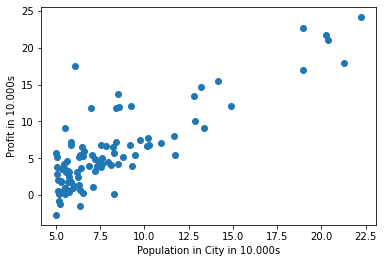

In [26]:
x = data.values[:, 0]
y = data.values[:, 1]
plt.scatter(x, y)
plt.ylabel('Profit in 10.000s')
plt.xlabel('Population in City in 10.000s')

In [27]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = (1, y.shape[0])
theta = np.zeros((X.shape[0], 1), dtype=np.float32)


In [28]:
def computeCost ( X , y , theta ) :
    Fx = np.dot(theta.T, X)
    M = y.size
    sigma = np.sum((Fx - y)**2) / (2*M)
    return sigma

computeCost(X,y,theta)

32.072733877455676

In [29]:
def h(x,theta):
    return theta.T@x
def computeCost ( X , y , theta ) :
    return ((h(X,theta)-y)**2).sum()/X.shape[1]/2
def simple_gradient(X, y, theta, alpha, it):
    cost=[]
    for i in range(it):
        theta = theta - alpha*((h(X,theta)-y)@X.T).T/X.shape[1]
        cost.append(computeCost(X,y,theta))
    return theta, cost

Text(0.5, 0, 'Population in City in 10.000s')

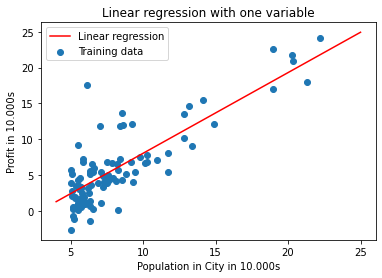

In [30]:
parameters,cost = simple_gradient(X,y,theta,0.01,1000)
b = parameters[0,0]
a = parameters[1,0]
x1 = np.linspace(4, 25, y.size, endpoint=True)
yGradient =  [a * xi + b for xi in x1]
plt.plot(x1,yGradient,'r')
plt.scatter(x,y)
plt.title('Linear regression with one variable')
plt.legend(['Linear regression','Training data'])
plt.ylabel('Profit in 10.000s')
plt.xlabel('Population in City in 10.000s')

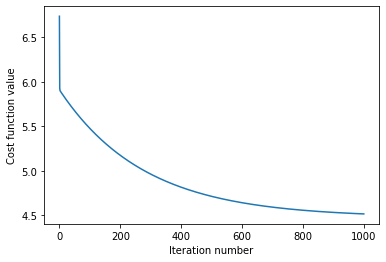

In [31]:
x_cost= np.arange(0, len(cost), 1)
plt.plot(x_cost, cost)
plt.ylabel('Cost function value')
plt.xlabel('Iteration number')
plt.show()

ZADANIE 2

In [32]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [33]:
x0 = data2.values[:,0]
x1 = data2.values[:,1]
y2 = data2.values[:,2]


x1 = (x1-x1.mean())/np.std(x1)
x0 = (x0-x0.mean())/np.std(x0)
y2 = (y2-y2.mean())/np.std(y2)


X2 = np.stack([np.ones(x0.shape, dtype=np.float32), x0, x1], axis=0)
y2.shape = [1, y2.shape[0]]
theta2 = np.zeros((X2.shape[0], 1), dtype=np.float32)
print(X2.shape)
print(y2.shape)

(3, 47)
(1, 47)


In [34]:
theta, cost = simple_gradient(X2,y2,theta2,0.01,1000)
print(f'Theta: {theta}')
computeCost(X2,y2,theta)

Theta: [[-7.51054065e-17]
 [ 8.79065699e-01]
 [-4.74786542e-02]]


0.13354178879075576

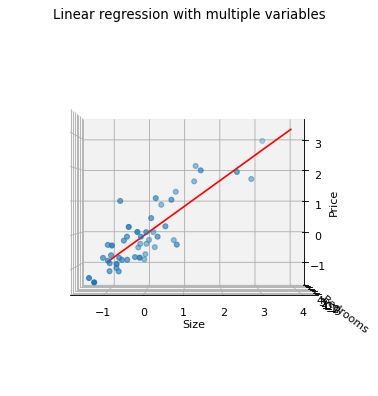

In [35]:
c = theta[0,0]
b = theta[1,0]
a = theta[2,0]
x0Grad = np.linspace(-1, 4, y2.size, endpoint=True)
x1Grad = np.linspace(-1, 4, y2.size, endpoint=True)
yGradient = (a*x0Grad + b*x1Grad + c)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x0, x1, y2)
ax.plot(x0Grad, x1Grad, yGradient,'r')
ax.set_title('Linear regression with multiple variables')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.view_init(0,-90)
plt.show()

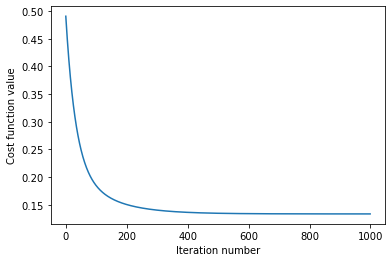

In [36]:
x_cost= np.arange(0, len(cost), 1)
plt.plot(x_cost, cost)
plt.ylabel('Cost function value')
plt.xlabel('Iteration number')
plt.show()

Zadanie 3

In [37]:
from sklearn import datasets, linear_model
 
# Data import
from sklearn.datasets import load_linnerud
X,y = load_linnerud(return_X_y=True)

LinnerudX = pd.DataFrame(X, columns=['weight','waist','pulse'])
LinnerudY = pd.DataFrame(y, columns=['chins','sit_ups','jumps'])

df = pd.merge(LinnerudX, LinnerudY, left_index=True, right_index=True)
df

,weight,waist,pulse,chins,sit_ups,jumps
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [38]:
# Normalization
y = df[['chins', 'sit_ups', 'jumps']]
X = df[['weight', 'waist', 'pulse']]


X = (X - X.min()) / (X.max() - X.min())

In [39]:
# Split into train and test sets (70-30%)



from sklearn.model_selection import train_test_split

# Split into validation and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((14, 3), (6, 3), (14, 3), (6, 3))

In [40]:
regr = linear_model.LinearRegression()

In [41]:

regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 


# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [[ 36.84222905 -97.87810313  18.51715393]
 [  1.3924536  -13.02825247   6.25840418]
 [  3.03888708   5.37545464  -9.06884791]]
Residual sum of squares: chins      1102.600615
sit_ups       8.262748
jumps        33.747397
dtype: float64


c:\Users\DELL\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [42]:
print('Y_predicted: \n', Y_predicted) 
print('Y_test: \n', Y_test) 

Y_predicted: 
 [[209.65062257  38.10112223  57.46322543]
 [212.15493467  39.98788681  55.22399379]
 [202.47018672  38.04009266  56.55622345]
 [213.94178156  37.59182146  58.77372499]
 [216.86554708  40.14055923  54.77666781]
 [212.3844467   39.68066253  55.62945428]]
Y_test: 
     chins  sit_ups  jumps
3   162.0     35.0   62.0
16  176.0     37.0   54.0
6   211.0     38.0   56.0
10  169.0     34.0   50.0
2   193.0     38.0   58.0
14  193.0     36.0   46.0


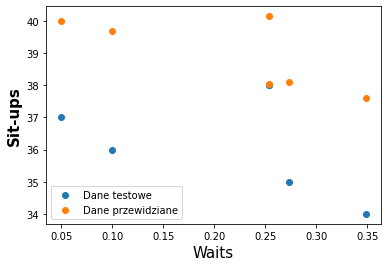

In [43]:
fig, ax = plt.subplots()
plt.scatter(X_test.iloc[:, 1], Y_test.iloc[:,1], label = "Dane testowe")
plt.scatter(X_test.iloc[:, 1], Y_predicted[:,1], label = "Dane przewidziane")
ax.set_xlabel("Waits", fontsize=15)
ax.set_ylabel("Sit-ups", fontsize=15, weight='bold')
plt.legend()


In [44]:
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(Y_test, Y_predicted, squared=True)
rms

381.53691963405436